# **Crop Recommendation System**

## STEP 1: IMPORTING LIBRARIES AND LOADING THE DATA 

In [111]:
# importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# reading the data
df = pd.read_csv("Crop_Recommendation.csv")
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


# STEP 2: DATA PREPROCESSING

In [112]:
# checking for null values  == no null values in the dataset
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [113]:
# checking for unique values  ==  we have 22 types of crops to be predicted
df.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
dtype: int64

In [114]:
# checking for data types == Crop values need to be encoded
print(df.dtypes)

Nitrogen         int64
Phosphorus       int64
Potassium        int64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop            object
dtype: object


In [115]:
# converting the target variable (Crop values) to numerical
le = LabelEncoder() 
df['Crop'] = le.fit_transform(df['Crop'])
print(df['Crop'])

0       20
1       20
2       20
3       20
4       20
        ..
2195     5
2196     5
2197     5
2198     5
2199     5
Name: Crop, Length: 2200, dtype: int64


In [116]:
# outlier detection

from scipy.stats import zscore

z_scores = df.apply(zscore)
outliers = (z_scores > 3.1) | (z_scores < -3.1)
# outliers_df = df[outliers.any(axis=1)] ==  171 outliers
df1 = df[~outliers.any(axis=1)]
df1

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [117]:
# splitting the data into features and target
X = df1.drop(['Crop'], axis=1)
y = df1['Crop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [118]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 3 : DATA VISUALIZATION

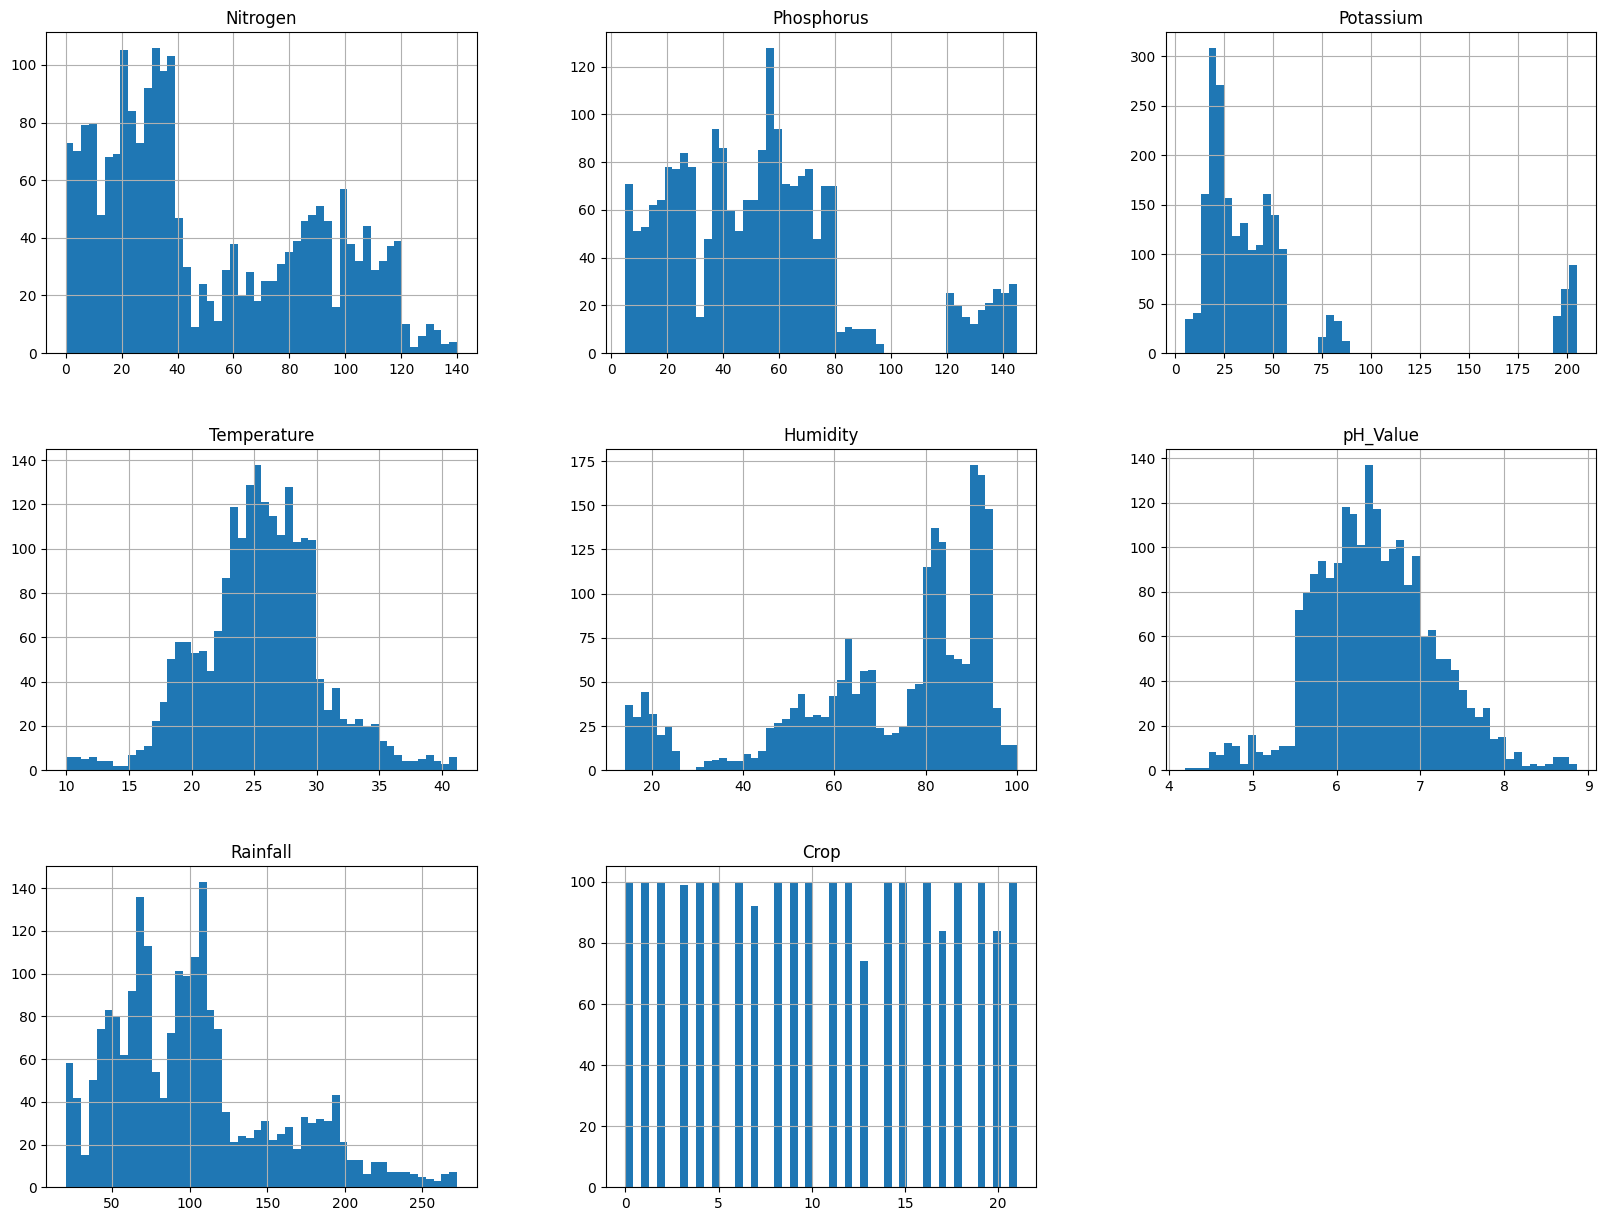

In [121]:
# histogram == shows the distribution of the data
df1.hist(bins=50, figsize=(20,15))
plt.show()

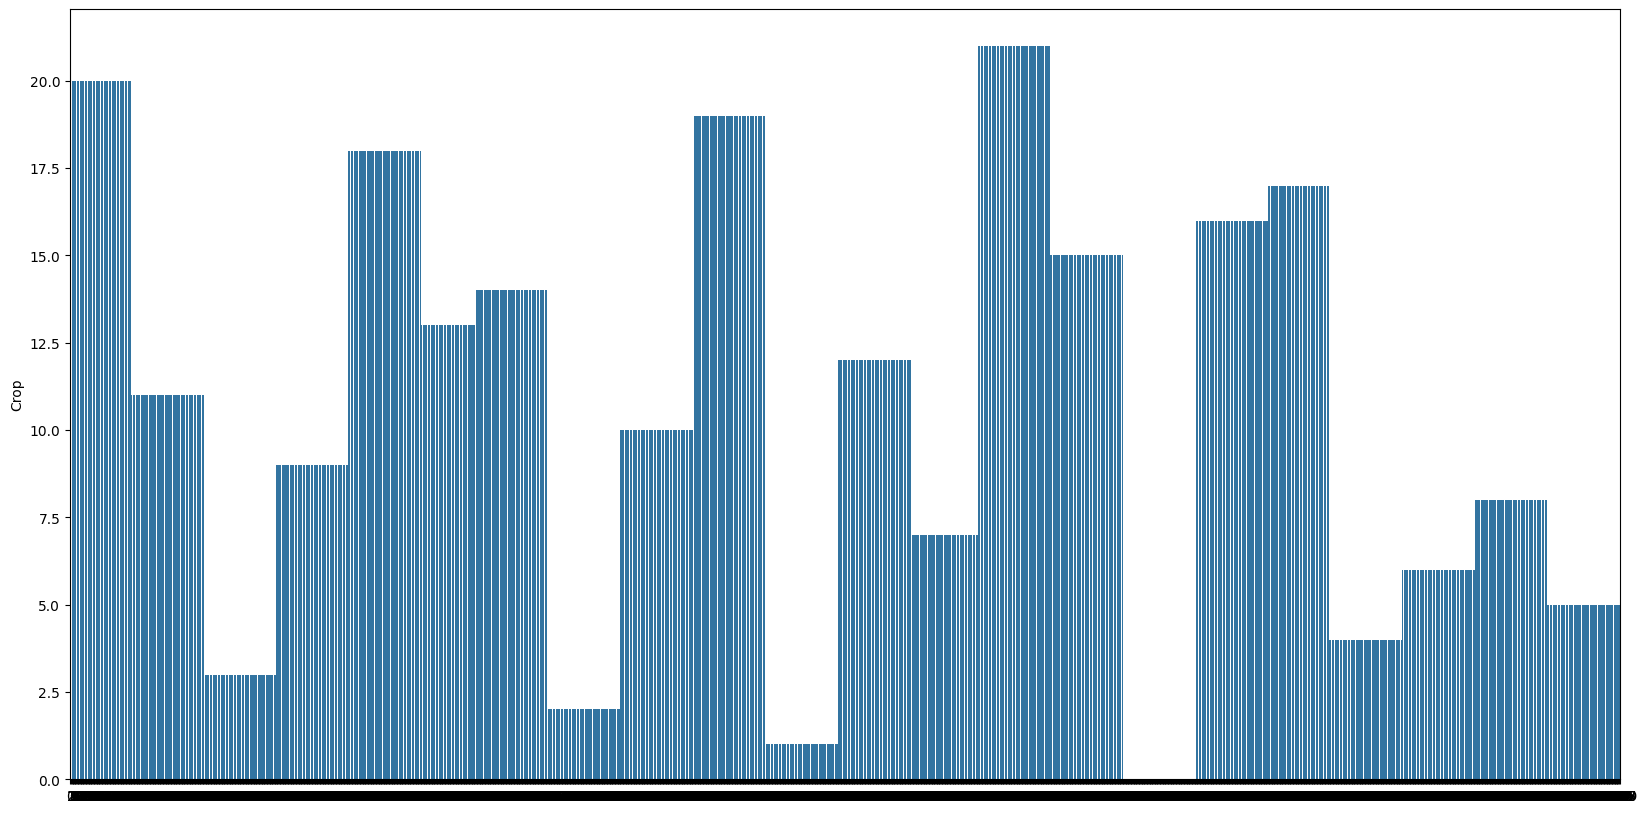

In [124]:
# bar plot == shows the distribution of the target variable
plt.figure(figsize=(20,10))
sns.barplot(df1['Crop'])
plt.show()


<Axes: >

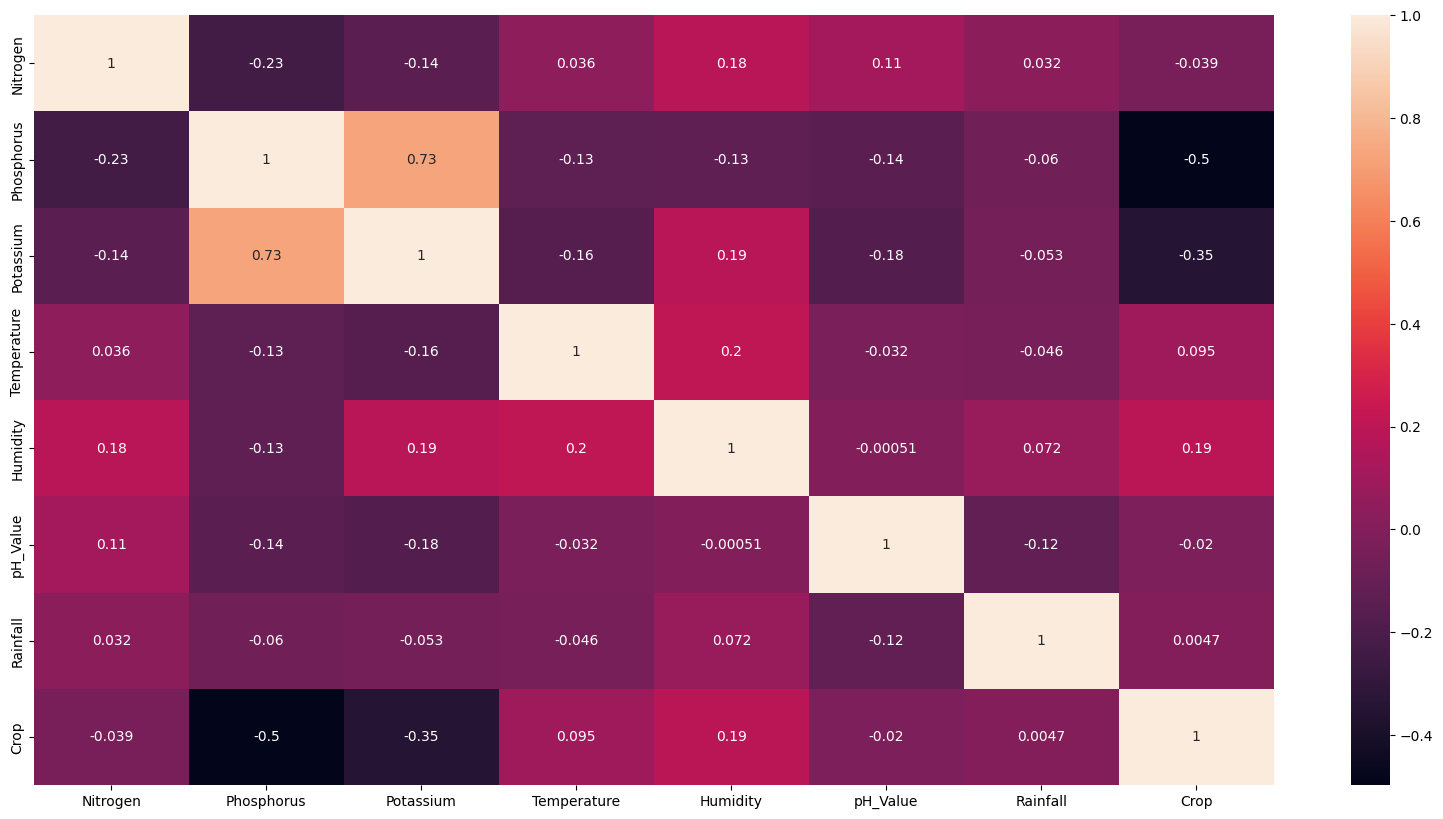

In [125]:
# heatmap == shows the correlation between the features

plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True)

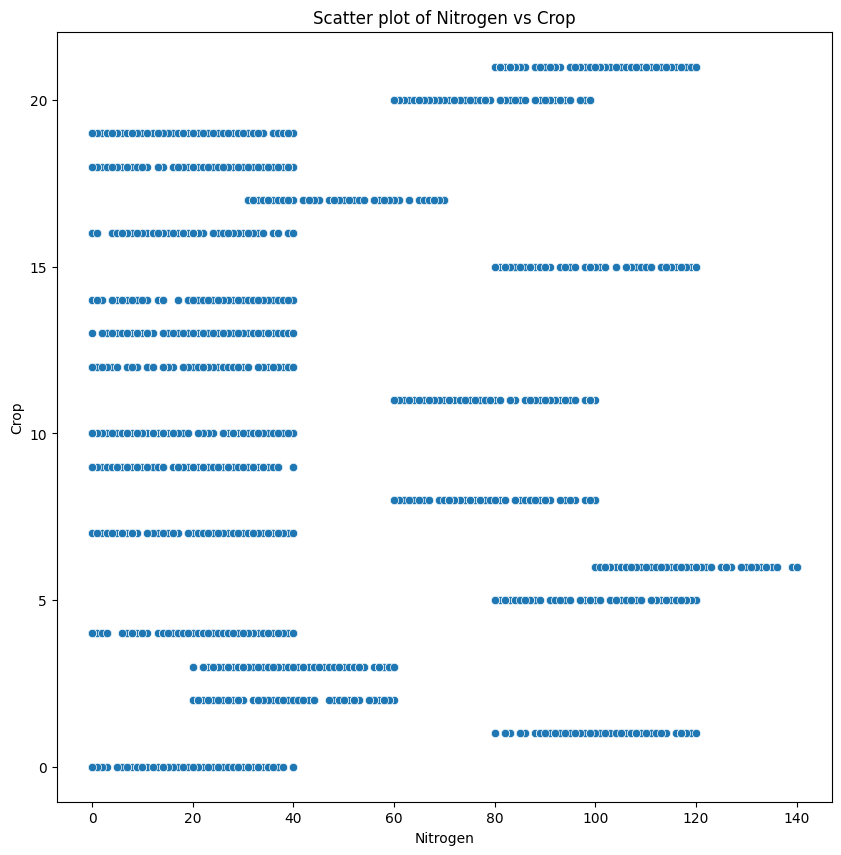

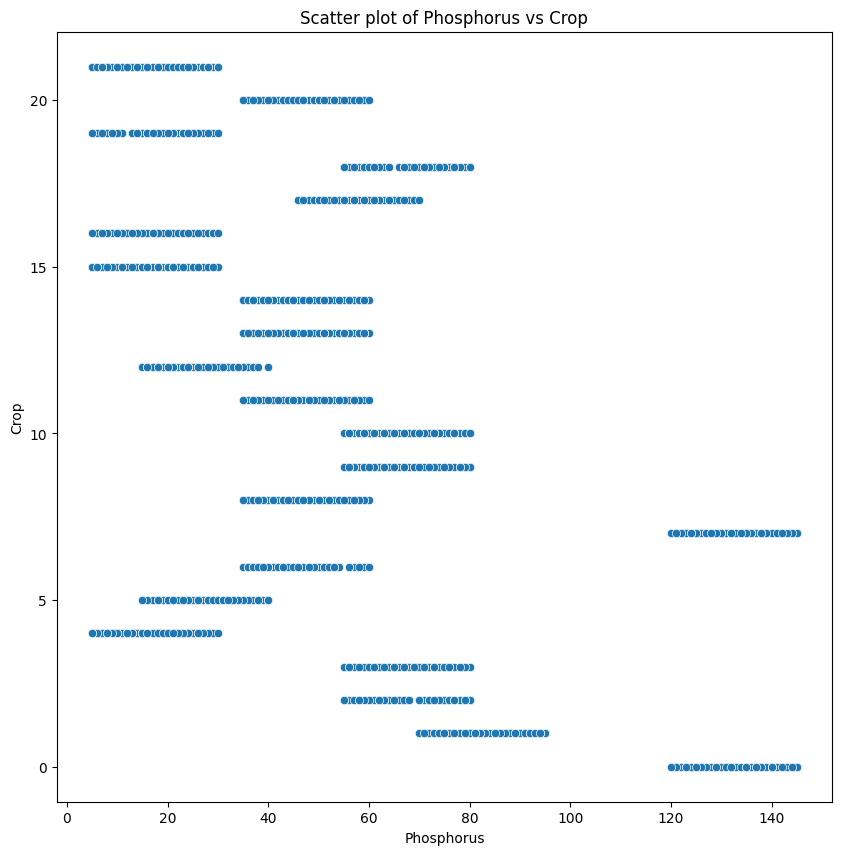

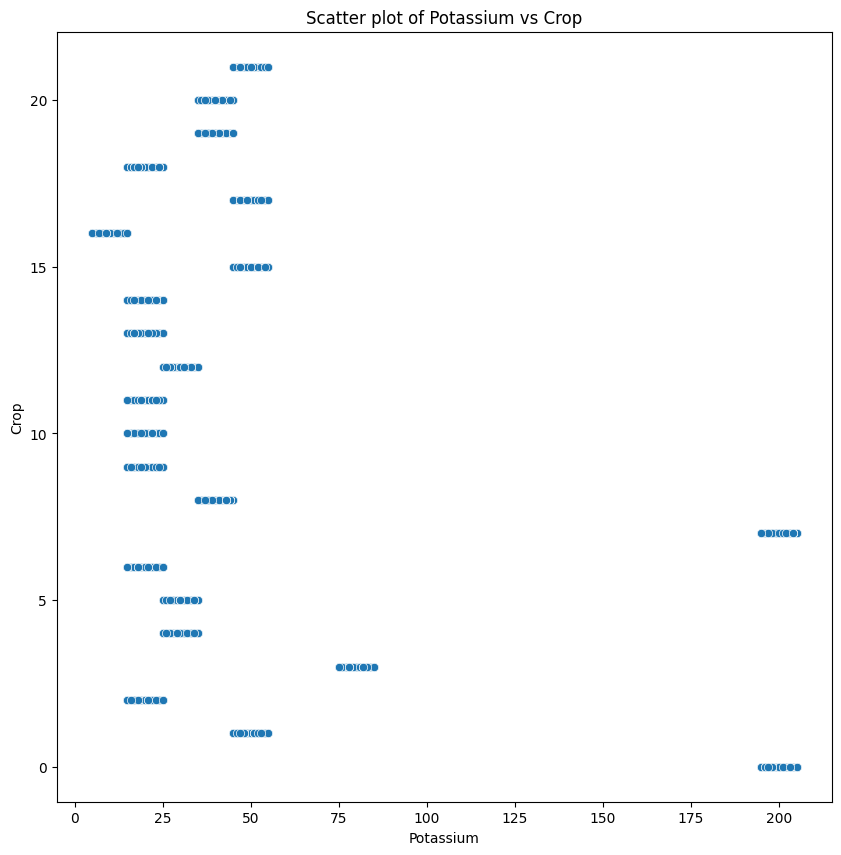

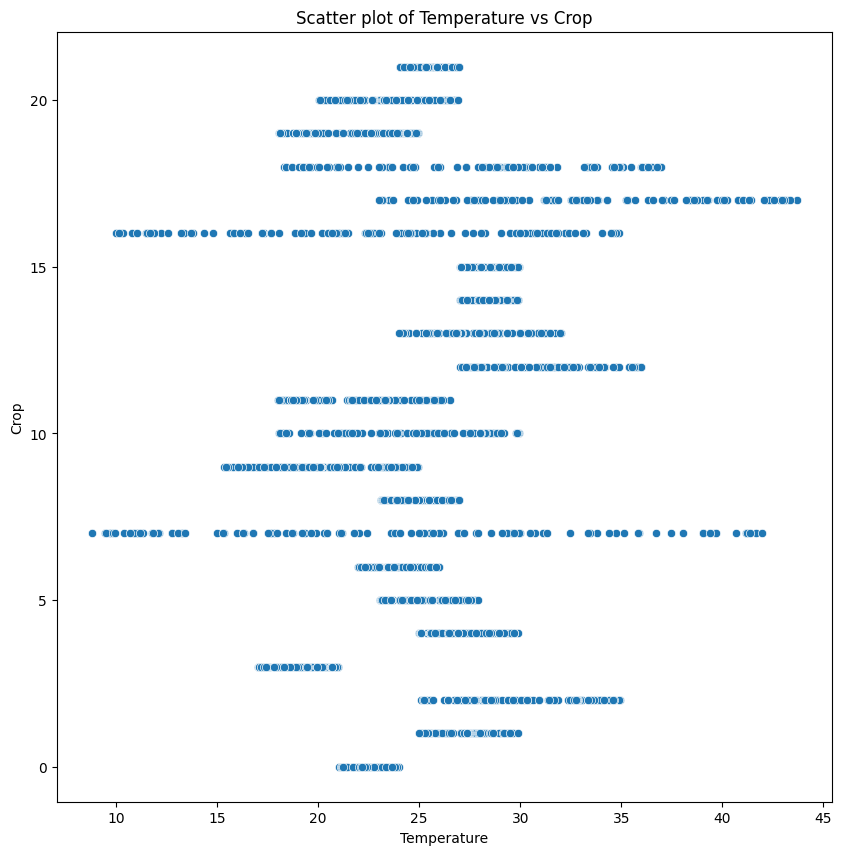

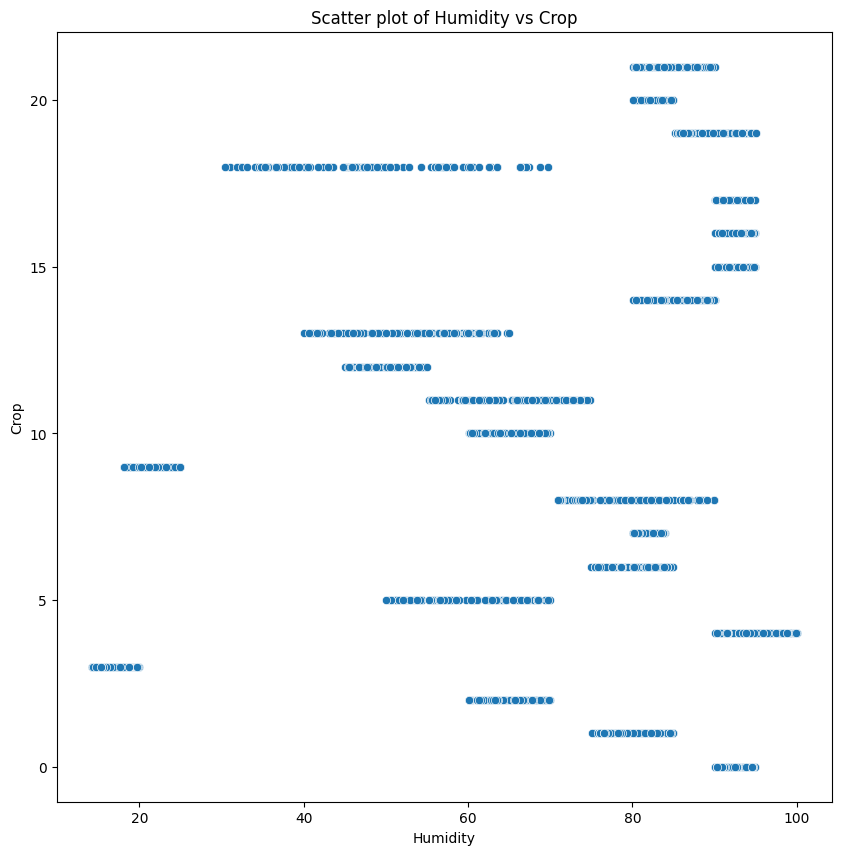

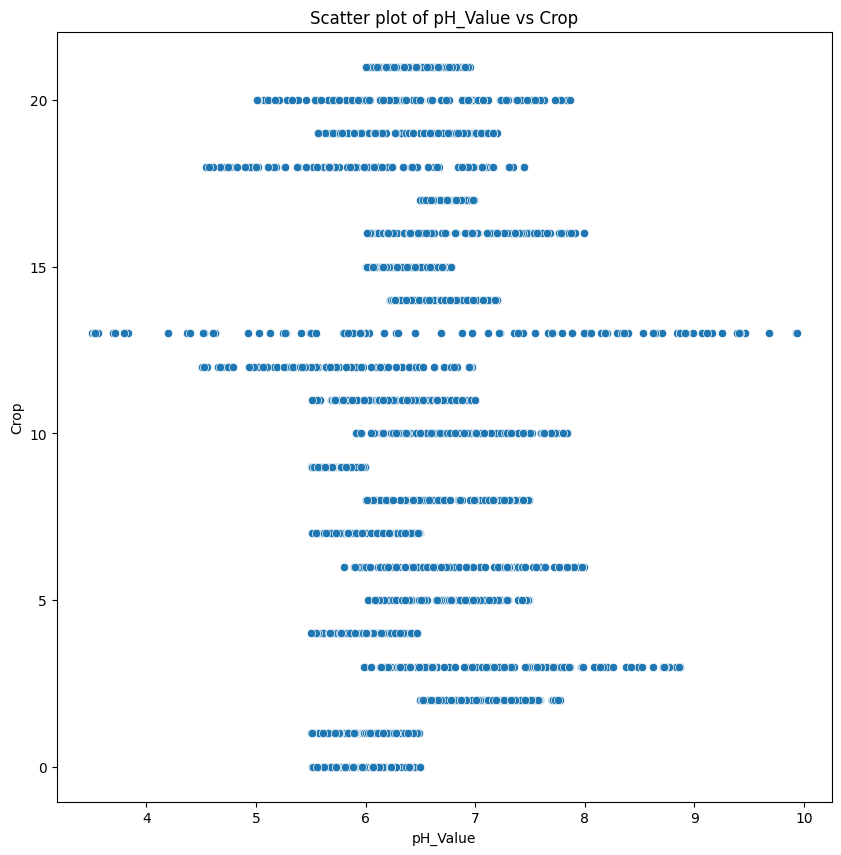

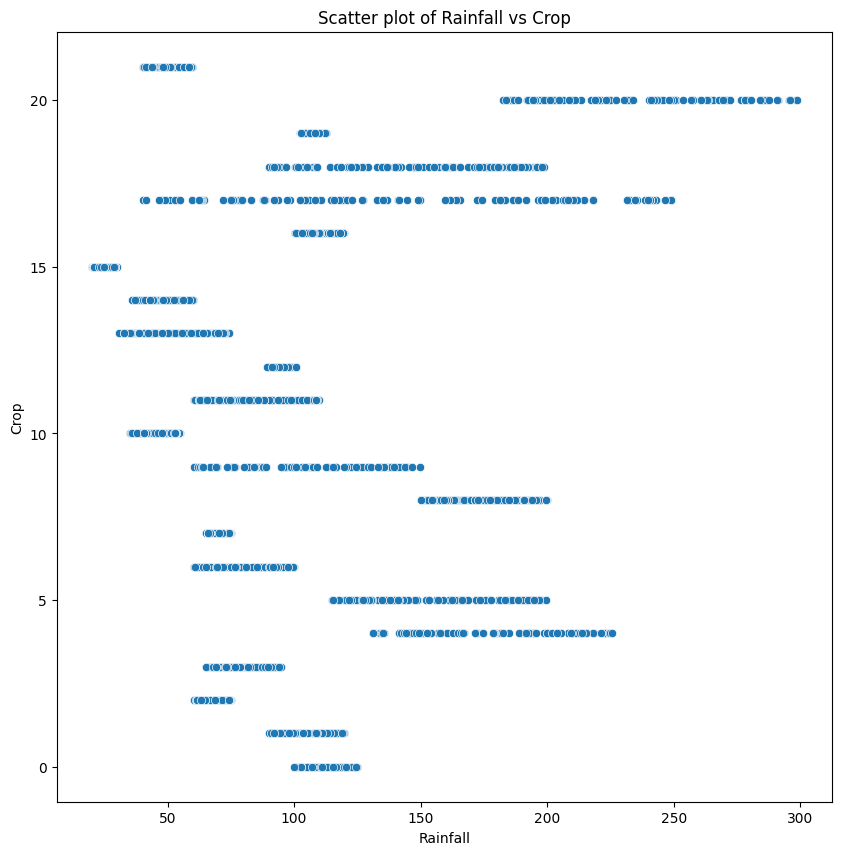

In [132]:
# scatter plot == shows the relationship between the features and the target variable

feature_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

for feature in feature_columns:
    plt.figure(figsize=(10,10))
    sns.scatterplot(x=feature, y='Crop', data=df)
    plt.title(f'Scatter plot of {feature} vs Crop')
    plt.show()

# STEP 4: MODEL BUILDING

In [103]:
# model creation

model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(75, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=100)



/Users/pragyan-pant/.pyenv/versions/3.11.4/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.2189 - loss: 2.8026 
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.5643 - loss: 1.6086
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.8601 - loss: 0.7421
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.8979 - loss: 0.3997
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.9194 - loss: 0.2673
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9358 - loss: 0.1987
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.9394 - loss: 0.1848
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.9558 - loss: 0.1379
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.9658 - loss: 0.1188
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.9658 - loss: 0.0994
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9627 - loss: 0.0929
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 

# STEP 5: MODEL EVALUATION AND TESTING

In [104]:
# Evaluating the model and saving it
model.evaluate(X_test_scaled, y_test)

model.save('model.h5')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9770 - loss: 0.0664   


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


<Axes: >

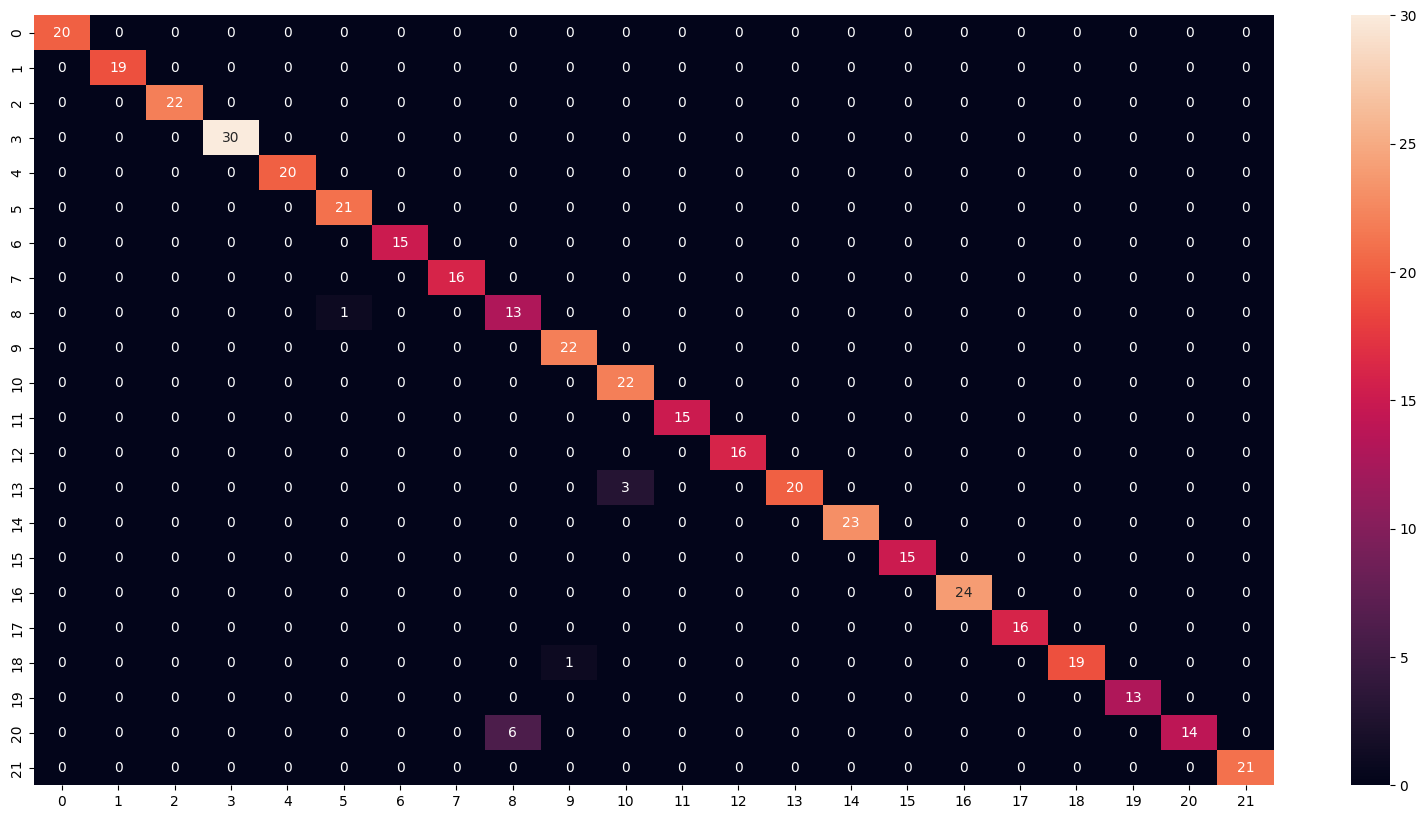

In [107]:
# confusion matrix
y_pred = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True)


In [110]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        16
           8       0.68      0.93      0.79        14
           9       0.96      1.00      0.98        22
          10       0.88      1.00      0.94        22
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        16
          13       1.00      0.87      0.93        23
          14       1.00      1.00      1.00        23
          15       1.00      1.00      1.00        15
          16       1.00      1.00      1.00        24
          17       1.00    

In [143]:
# loading the model and making predictions

model = keras.models.load_model('model.h5')

input_data = ([89, 45, 39, 27, 91, 7.5, 100])
input_data = np.array(input_data).reshape(1, -1)

model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0.]], dtype=float32)

In [144]:
# converting the predicted value to the actual crop
predicted_crop = le.inverse_transform([np.argmax(model.predict(input_data))])
print(predicted_crop)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
['Papaya']
